# 3. 머신러닝(3) (06.24.수)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split

# pip install mglearn
import mglearn
from numpy import linalg




from sklearn.linear_model import LogisticRegression    # 회귀알고리즘
from sklearn.svm import LinearSVC                      # 회귀알고리즘


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000, n_features=2,n_informative=2,n_redundant=0,random_state=0)

In [3]:
model=LogisticRegression().fit(X,y)

Text(0, 0.5, 'True Positive Rate(Recall)')

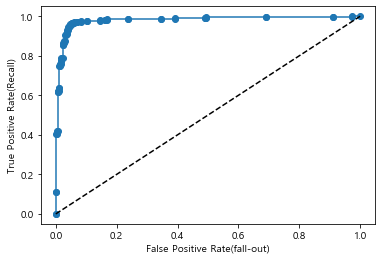

In [8]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y,model.decision_function(X))

plt.plot(fpr,tpr,'o-',label='Logistic Regression')       # 그래프에서 휘어진 부분이 thresholds이다.
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate(fall-out)')           # 양성으로 잘못맞춘 비율
plt.ylabel('True Positive Rate(Recall)')              

### 사례1 타이타닉 (train.csv 파일로 실습)
    - 성능을 제대로 측정했는지에 대한 관점

In [265]:
df= pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [266]:
cols_to_keep=['Survived','Age','Fare']

In [268]:
dummy_class=pd.get_dummies(df['Pclass'],prefix='Pclass')    # get_dummies의 용도???    0과 1로 나타내기 위함.
print(dummy_class)        # Pclass의 1,2,3을 1끼리 2끼리 3끼리 구분

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[891 rows x 3 columns]


In [96]:
dummy_sex=pd.get_dummies(df['Sex'],prefix='Sex')
dummy_sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [97]:
df1=df[cols_to_keep].join(dummy_class.loc[:,'Pclass1':])  
df1

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1
...,...,...,...,...,...,...
886,0,27.0,13.0000,0,1,0
887,1,19.0,30.0000,1,0,0
888,0,NaN,23.4500,0,0,1
889,1,26.0,30.0000,1,0,0


In [98]:
# df1=df1.join(dummy_sex.loc[:,'Sex_male'])
# df1.head()

# 


df1 = df1.join(dummy_sex.loc[:,"Sex_male"])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [99]:
train_cols=df1.columns[1:]  #컬럼을 0번째 제외 첫번째 부터 
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [100]:
df1[train_cols]

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,22.0,7.2500,0,0,1,1
1,38.0,71.2833,1,0,0,0
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,0,0
4,35.0,8.0500,0,0,1,1
...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,1
887,19.0,30.0000,1,0,0,0
888,NaN,23.4500,0,0,1,0
889,26.0,30.0000,1,0,0,1


In [101]:
np.isnan(df1[train_cols])

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,True,False,False,False,False,False
889,False,False,False,False,False,False


In [102]:
# 결측치삭제
#df1[train_cols]=df1[train_cols].dropna(axis=0)     #열기준으로 결측치삭제
#df1['Survived']=df1['Survived'].dropna(axis=0)

# 0으로 대체
df1[train_cols]=df1[train_cols].fillna(0)
df1['Survived']=df1['Survived'].fillna(0)

In [103]:
import statsmodels.api as sm
model=sm.Logit(df1['Survived'],df1[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


In [104]:
model.summary2()


# coef가 편향회귀로

# pclass1  수치가 제일높은대 제일 잘살고

# Sex_male이 -2.6이라 여자일수록 잘살고

# fare와 age는 계수가 낮아서 상관이없다

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2020-06-24 11:15 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [105]:
model2 = LogisticRegression().fit(df1[train_cols], df1["Survived"])

In [106]:
df1['predict']=model2.predict(df1[train_cols])
df1

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,1,0,1,0
887,1,19.0,30.0000,1,0,0,0,1
888,0,0.0,23.4500,0,0,1,0,1
889,1,26.0,30.0000,1,0,0,1,0


In [107]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df1['Survived'],df1['predict'])


array([[456,  93],
       [100, 242]], dtype=int64)

In [108]:
print('정확도: ',model2.score(df1[train_cols],df1['Survived']))
print('정확도: ',(242+458)/(458+91+100+242))

정확도:  0.7833894500561167
정확도:  0.7856341189674523


In [109]:
from sklearn.metrics import classification_report

print(classification_report(df1['Survived'],df1['predict']))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positive Rate(Recall)')

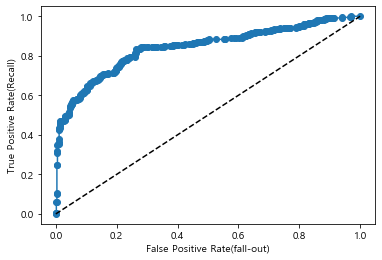

In [110]:
fpr,tpr,thresholds=roc_curve(df1['Survived'],model2.decision_function(df1[train_cols]))

plt.plot(fpr,tpr,'o-',label='Logistic Regression')       # 그래프에서 휘어진 부분이 thresholds이다.
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate(fall-out)')           # 양성으로 잘못맞춘 비율
plt.ylabel('True Positive Rate(Recall)')              

### 사례2 Cancer
      - 좋은 성능을 재기 위한 방법에 대한 관점

In [269]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [81]:
data=pd.DataFrame(cancer.data,columns=cancer.feature_names)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [83]:
data['class']=pd.Series(cancer.target,dtype='category')
data.tail

<bound method NDFrame.tail of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [111]:
X=data.loc[:,'mean radius' : 'worst fractal dimension']
y=data['class']

In [114]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# 테스트사이즈의 비율은 25% , 훈련데이터는 75%

print(X_train.shape,X_test.shape)

(426, 30) (143, 30)


In [115]:
log_reg=LogisticRegression().fit(X_train,y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [117]:
X2=sm.add_constant(X)
model=sm.OLS(y,X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          6.05e-153
Time:                        11:36:49   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [118]:
from sklearn import metrics

y_pred =log_reg.predict(X_test)
print("정확도: ",metrics.accuracy_score(y_test,y_pred))

정확도:  0.951048951048951


In [119]:
cnt=metrics.confusion_matrix(y_test,y_pred)
cnt

array([[52,  1],
       [ 6, 84]], dtype=int64)

In [124]:
# p-value가 0.05보다 작은 feature들만 선별


X=data[['mean compactness','smoothness error','concavity error','worst radius','worst area']]
y=data['class']

In [125]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [128]:
log_reg=LogisticRegression().fit(X_train,y_train)

In [129]:
X2=sm.add_constant(X)
model=sm.OLS(y,X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          6.37e-137
Time:                        11:53:04   Log-Likelihood:                -69.240
No. Observations:                 569   AIC:                             150.5
Df Residuals:                     563   BIC:                             176.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9459      0.145  

In [130]:
y_pred =log_reg.predict(X_test)
print("정확도: ",metrics.accuracy_score(y_test,y_pred))

정확도:  0.916083916083916


In [131]:
cnt=metrics.confusion_matrix(y_test,y_pred)
cnt

array([[47,  6],
       [ 6, 84]], dtype=int64)

In [137]:
# P밸류가 0.05보다 큰 feature를 선택하면? 어떤 변화가 있을까/

X = data[["mean texture", "mean smoothness", "mean fractal dimension", 
          "mean symmetry", "texture error"]]
y = data["class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,    # 테스트데이터의 크기 설정. 25%로 설정하겠다.
                                                    random_state=0)
log_reg = LogisticRegression().fit(X_train, y_train)

# 레포트
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

# 오차표 - 어떤걸 어떻게 틀렸나?
cnt = metrics.confusion_matrix(y_test, y_pred)
print(cnt)

# 정확도
y_pred = log_reg.predict(X_test)
print("정확도:", metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     84.55
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           3.39e-66
Time:                        11:58:23   Log-Likelihood:                -234.52
No. Observations:                 569   AIC:                             481.0
Df Residuals:                     563   BIC:                             507.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

# Decision Tree (핸즈온p.229)

    - Graphviz 다운로드 : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    
    - pip install graphviz
    
    - 참고 : https://leedakyeong.tistory.com/entry/Decision-Tree%EB%9E%80-ID3-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

In [140]:
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

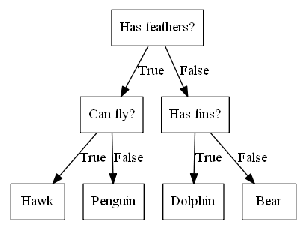

In [142]:
mglearn.plots.plot_animal_tree()

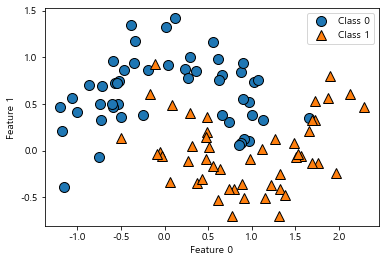

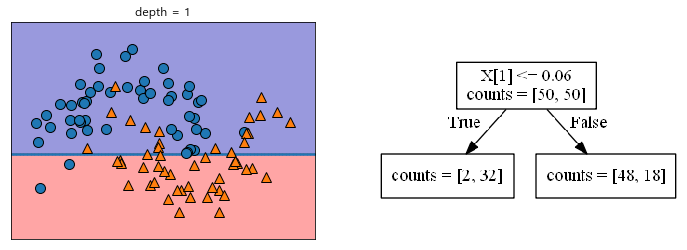

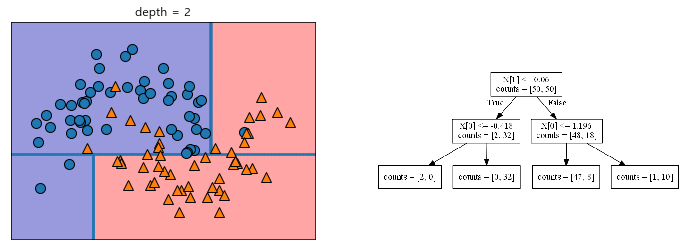

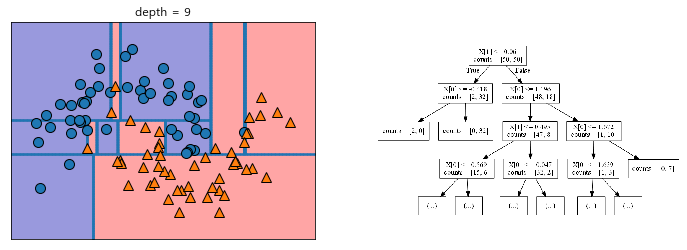

In [143]:
mglearn.plots.plot_tree_progressive()

## IRIS예제

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [155]:
df_clf=DecisionTreeClassifier(random_state=156)
iris=load_iris()

In [156]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state=11)
df_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

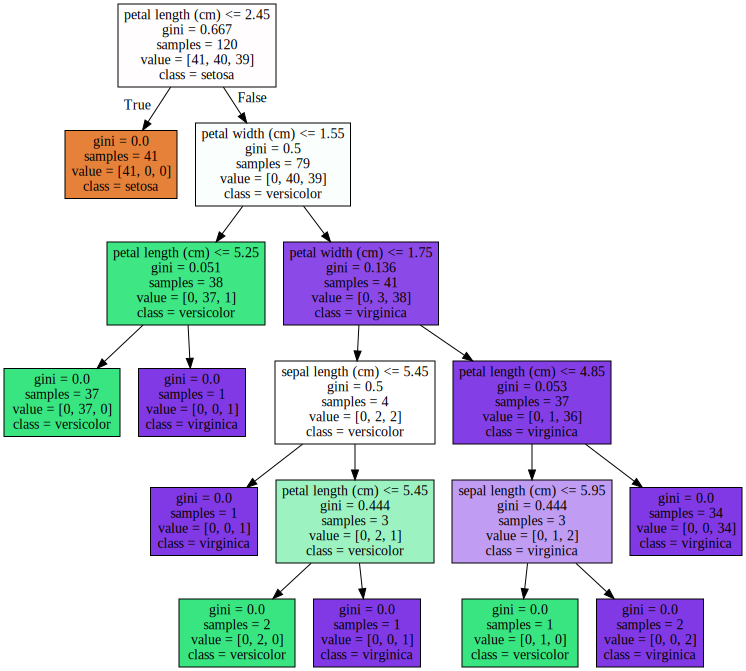

In [166]:
from sklearn.tree import export_graphviz

#훈련결과 저장하기. (tree.dot으로 저장함)
export_graphviz(df_clf,out_file='data/tree.dot',class_names=iris.target_names,feature_names=iris.feature_names,
               impurity=True,filled=True)



# 생성한 파일을 활용하여 그래프비즈에서 비주얼라이징
import graphviz

f = open("data/tree.dot")
dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

In [ ]:
# gini값이 0이면 이제 더이상 계산할것이 없다는 것이다. 더 이상 분류할 것이 없다. 
# depth(깊이)를 적절하게 찾는 것이 중요하다. 

## 복잡도제어 : Prunning
   - 사전가지치기 
   
   - 사후가지치기
   
   - sklearn에서는 사후가지치기만 지원
   
   - 매개변수
         max_depth
         max_leaf_nodes    : 말단노드(leaf_nodes)의 최대개수
         min_samples_leaf  : 리프노드가 되기 위한 최소한의 샘플개수
         min_samples_split : 노드가 분기할 수 있는 최소샘플갯수
         max_features      : 최적의 분할을 위해 고려할 피처갯수

In [167]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=42)

In [262]:
tree=DecisionTreeClassifier(random_state=0,max_depth=4).fit(X_train,y_train)
tree

print('train: ',tree.score(X_train,y_train))
print('test: ',tree.score(X_test,y_test))

# max_depth(깊이)가 깊어지면 과대적합이 생긴다. max_depth 숫자가 커질수록 train이 1에 가까워진다.

train:  0.9882629107981221
test:  0.951048951048951


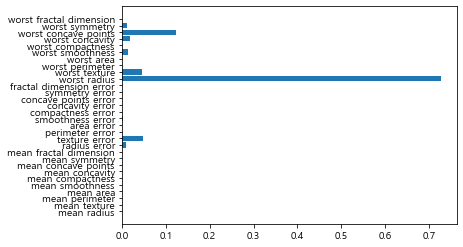

In [263]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
plot_feature_importances_cancer(tree)    

In [180]:
#print(tree.feature_importances_)

for name, value in zip(cancer.feature_names,tree.feature_importances_):
    print(name,value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


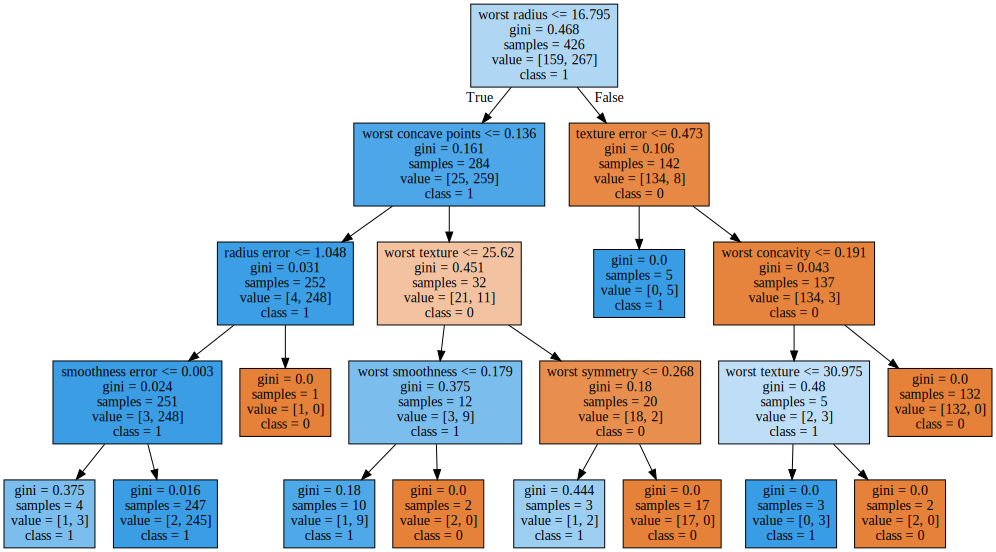

In [181]:
export_graphviz(tree,out_file='data/tree.dot',class_names=['0','1'],
                feature_names=cancer.feature_names,impurity=True,filled=True)



# 생성한 파일을 활용하여 그래프비즈에서 비주얼라이징 
import graphviz

f = open("data/tree.dot")
dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

### 사례1 : iris

In [189]:
df_clf=DecisionTreeClassifier(random_state=156)
iris=load_iris()

df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['result']=iris.target
df


X=iris.data[:,[2,3]]
y=iris.target


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

dt_clf=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
print('train: ',dt_clf.score(X_train,y_train))
print('test: ',dt_clf.score(X_test,y_test))

train:  0.9910714285714286
test:  0.9473684210526315


### 사례2 : 서울지역 동 분류

In [190]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [229]:
train_df=pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [230]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]
test_df=pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [231]:
train_df.label.value_counts()
test_df.label.value_counts()

Gangnam     5
Gangbuk     5
Gangdong    5
Gangseo     5
Name: label, dtype: int64

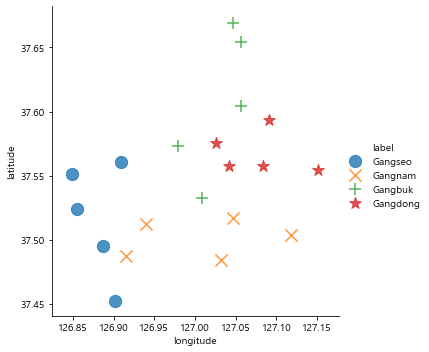

In [232]:
sns.lmplot('longitude','latitude',data=train_df,fit_reg=False,hue='label',markers=['o','x','+','*'],
          scatter_kws={'s':150})    # hue= 색깔, scatter_kws={'s':150}= 점크기

In [233]:
# train_df.drop(['district'],axis=1,inplace=True)
# test_df.drop(['dong'],axis=1,inplace=True)

train_df.drop(["district"],axis=1, inplace=True)
test_df.drop(["dong"],axis=1, inplace=True)

In [234]:
train_df 
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [235]:
X_train=train_df[['longitude','latitude']]
y_train=train_df[['label']]

X_test=test_df[['longitude','latitude']]
y_test=test_df[['label']]

In [237]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
y_encode=le.fit_transform(y_train)
y_encode

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [245]:
clf=DecisionTreeClassifier(random_state=35,max_depth=1).fit(X_train,y_encode)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

In [246]:
from sklearn.metrics import accuracy_score

pred=clf.predict(X_test)
print(accuracy_score(y_test.values,le.classes_[pred]))

0.5


## Random Forest
      - 배깅(boostrap aggregating)
      

In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [252]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, stratify=y)

In [255]:
forest=RandomForestClassifier(random_state=2,n_estimators=5).fit(X_train,y_train)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

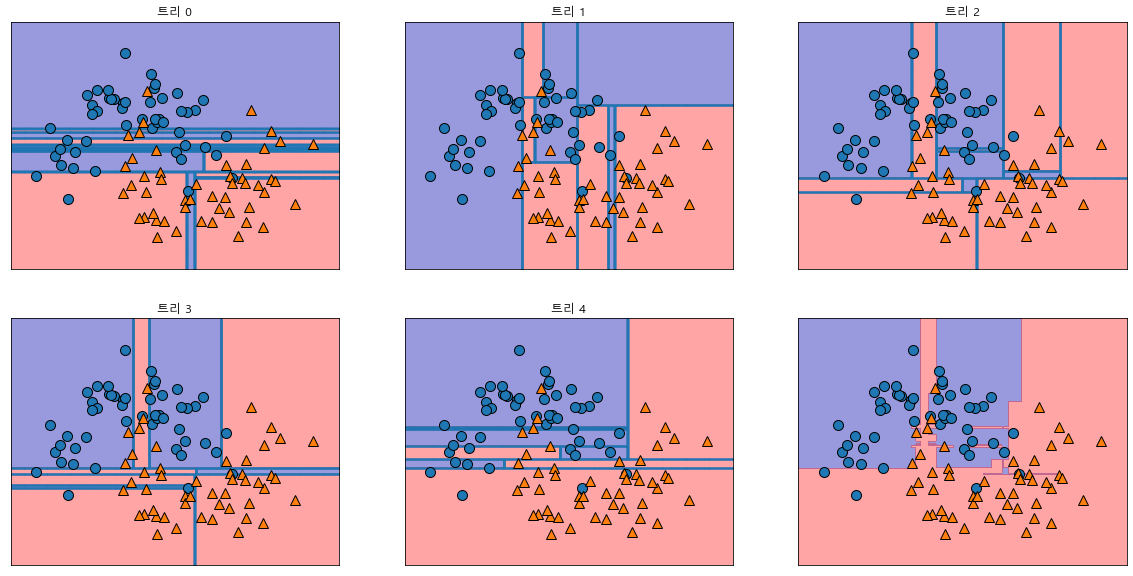

In [256]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [258]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=42)

forest=RandomForestClassifier(random_state=0,n_estimators=150).fit(X_train,y_train)

print('train: ',forest.score(X_train,y_train))
print('test: ',forest.score(X_test,y_test))

train:  1.0
test:  0.958041958041958


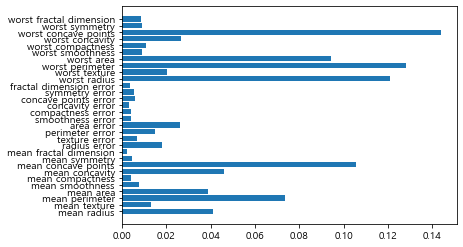

In [264]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
plot_feature_importances_cancer(forest)    